## MOwNiT - Lab1
### Kacper Ćwiertnia

Importuję paczkę "LinearAlgebra" potrzebną do obliczenia iloczynu skalarnego wektorów oraz mnożenia macierzy kwadratowej przez wektor.

In [21]:
using Pkg
Pkg.add("LinearAlgebra")
using LinearAlgebra

   Resolving package versions...
  No Changes to `/opt/jupyterhub/kernels/julia-1.8/share/julia/environments/v1.8/Project.toml`
  No Changes to `/opt/jupyterhub/kernels/julia-1.8/share/julia/environments/v1.8/Manifest.toml`


Tworzę funkcję, która dla zadanego wymiaru wygeneruję dwa wektory, a następnie zwróci czas obliczenia ich iloczynu skalarnego.

In [22]:
function dot_product(dim)
    x = rand(Float64, dim)
    y = rand(Float64, dim)
    @elapsed begin 
        dot(x,y)
    end
end

dot_product (generic function with 1 method)

Tworzę wektor, w którym zapisuję po 10 pomiarów czasu dla 10 róznych wymiarów (10, 20, ..., 100).

In [23]:
dot_times = Vector{Float64}()
for j = 1:10
    dot_product(j*10)
    for i = 1:10
        push!(dot_times, dot_product(j*10))
    end
end

Tworzę funkcję, która dla zadanego wymiaru wygeneruję macierz oraz wektory, a następnie zwróci czas wymnożenia macierzy przez ten wektor.

In [24]:
function matrix_multi(dim)
    matrix = rand(Float64, (dim, dim))
    a = rand(Float64, dim)
    @elapsed begin 
        matrix * a
    end
end

matrix_multi (generic function with 1 method)

Tworzę wektor, w którym zapisuję po 10 pomiarów czasu dla 10 róznych wymiarów (10, 20, ..., 100).

In [25]:
matrix_times = Vector{Float64}()
for j = 1:10
    matrix_multi(j*10)
    for i = 1:10
        push!(matrix_times, matrix_multi(j*10))
    end
end

Importuję paczkę "DataFrames" potrzebną do uporządkowania zebranych danych.

In [26]:
Pkg.add("DataFrames")
using DataFrames

   Resolving package versions...
  No Changes to `/opt/jupyterhub/kernels/julia-1.8/share/julia/environments/v1.8/Project.toml`
  No Changes to `/opt/jupyterhub/kernels/julia-1.8/share/julia/environments/v1.8/Manifest.toml`


Zebrane dane zapsiuje w DataFrame.

In [27]:
data_times = DataFrame(Dimensions = map(x->((x-1)÷10)*10+10,(1:100)), Dot_Times = dot_times, Matrix_Times = matrix_times)

Row,Dimensions,Dot_Times,Matrix_Times
,Int64,Float64,Float64
1,10,6.0e-8,4.17e-7
2,10,4.9e-8,3.49e-7
3,10,8.9e-8,3.46e-7
4,10,4.6e-8,2.52e-7
5,10,4.8e-8,2.46e-7
6,10,5.1e-8,2.48e-7
7,10,4.7e-8,2.51e-7
8,10,1.24e-7,2.48e-7
9,10,4.6e-8,2.54e-7


Importuję paczkę "CSV" potrzebną do zapisania zebranych danych do pliku.

In [28]:
Pkg.add("CSV")
using CSV

   Resolving package versions...
  No Changes to `/opt/jupyterhub/kernels/julia-1.8/share/julia/environments/v1.8/Project.toml`
  No Changes to `/opt/jupyterhub/kernels/julia-1.8/share/julia/environments/v1.8/Manifest.toml`


Zapisuję zebrane dane do pliku.

In [29]:
CSV.write("dataTimes.csv", data_times)

"dataTimes.csv"

Odczytuje zebrane dane z pliku.

In [30]:
input="dataTimes.csv"
data_times_new=CSV.read(input, delim=",", DataFrame)

Row,Dimensions,Dot_Times,Matrix_Times
,Int64,Float64,Float64
1,10,6.0e-8,4.17e-7
2,10,4.9e-8,3.49e-7
3,10,8.9e-8,3.46e-7
4,10,4.6e-8,2.52e-7
5,10,4.8e-8,2.46e-7
6,10,5.1e-8,2.48e-7
7,10,4.7e-8,2.51e-7
8,10,1.24e-7,2.48e-7
9,10,4.6e-8,2.54e-7


Grupuję odczytane dane względem wymiarów wektorów.

In [31]:
times_grouped_dims = groupby(data_times_new, :Dimensions)

Row,Dimensions,Dot_Times,Matrix_Times
,Int64,Float64,Float64
1,10,6.0e-8,4.17e-7
2,10,4.9e-8,3.49e-7
3,10,8.9e-8,3.46e-7
4,10,4.6e-8,2.52e-7
5,10,4.8e-8,2.46e-7
6,10,5.1e-8,2.48e-7
7,10,4.7e-8,2.51e-7
8,10,1.24e-7,2.48e-7
9,10,4.6e-8,2.54e-7


Importuję paczkę "Statistics" potrzebną do obliczenia średniej oraz odchylenia standardowego dla każdego wymiaru.

In [32]:
Pkg.add("Statistics")
using Statistics

   Resolving package versions...
  No Changes to `/opt/jupyterhub/kernels/julia-1.8/share/julia/environments/v1.8/Project.toml`
  No Changes to `/opt/jupyterhub/kernels/julia-1.8/share/julia/environments/v1.8/Manifest.toml`


Obliczam średnią czasu potrzebnego do wyliczenia iloczynu skalarnego dla każego wymiaru.

In [33]:
dot_times_mean = combine(times_grouped_dims, :Dot_Times => mean)

Row,Dimensions,Dot_Times_mean
,Int64,Float64
1,10,6.03e-8
2,20,4.51e-8
3,30,7.52e-8
4,40,7.16e-8
5,50,9.64e-8
6,60,8.98e-8
7,70,7.92e-8
8,80,6.52e-8
9,90,1.377e-7


Obliczam średnią czasu potrzebnego do wymnożenia macierzy przez wektor dla każego wymiaru.

In [34]:
matrix_times_mean = combine(times_grouped_dims, :Matrix_Times => mean)

Row,Dimensions,Matrix_Times_mean
,Int64,Float64
1,10,2.864e-7
2,20,2.75e-7
3,30,1.4195e-6
4,40,4.388e-7
5,50,6.08e-7
6,60,7.776e-7
7,70,1.4309e-6
8,80,1.4454e-6
9,90,2.1344e-6


Obliczam odchylenie standradowe czasu potrzebnego do wyliczenia iloczynu skalarnego dla każego wymiaru.

In [35]:
dot_times_std = combine(times_grouped_dims, :Dot_Times => std)

Row,Dimensions,Dot_Times_std
,Int64,Float64
1,10,2.61026e-8
2,20,2.42441e-9
3,30,4.74267e-8
4,40,3.3731e-9
5,50,5.90521e-8
6,60,2.23547e-8
7,70,2.01869e-8
8,80,1.26386e-8
9,90,9.36032e-8


Obliczam odchylenie standardowe czasu potrzebnego do wymnożenia macierzy przez wektor dla każego wymiaru.

In [36]:
matrix_times_std = combine(times_grouped_dims, :Matrix_Times => std)

Row,Dimensions,Matrix_Times_std
,Int64,Float64
1,10,6.12013e-8
2,20,8.69789e-8
3,30,3.2944e-6
4,40,1.82455e-7
5,50,6.76708e-8
6,60,1.29434e-7
7,70,1.04615e-7
8,80,1.87984e-7
9,90,1.92945e-7


Importuję paczkę "Plots" potrzebną do narysowania wykresów na podstawie wyliczonych estymatorów.

In [37]:
Pkg.add("Plots")
using Plots

   Resolving package versions...
  No Changes to `/opt/jupyterhub/kernels/julia-1.8/share/julia/environments/v1.8/Project.toml`
  No Changes to `/opt/jupyterhub/kernels/julia-1.8/share/julia/environments/v1.8/Manifest.toml`


Wykres dla iloczynu skalarnego.

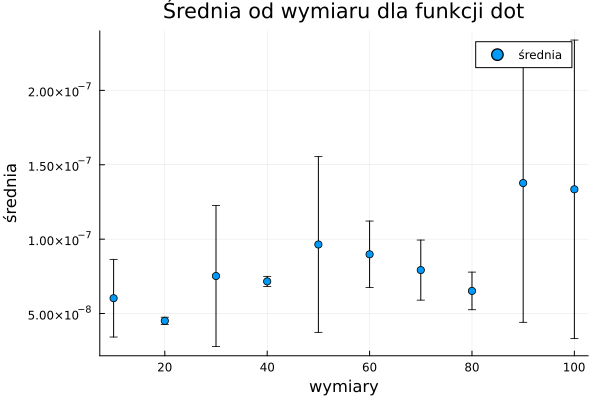

In [38]:
dot_plot = scatter(dot_times_mean[!,:Dimensions], dot_times_mean[!,:Dot_Times_mean], yerr=dot_times_std[!,:Dot_Times_std], title = "Średnia od wymiaru dla funkcji dot", ylabel="średnia", xlabel = "wymiary", label="średnia")

Wykres dla iloczynu macierzy i wektora.

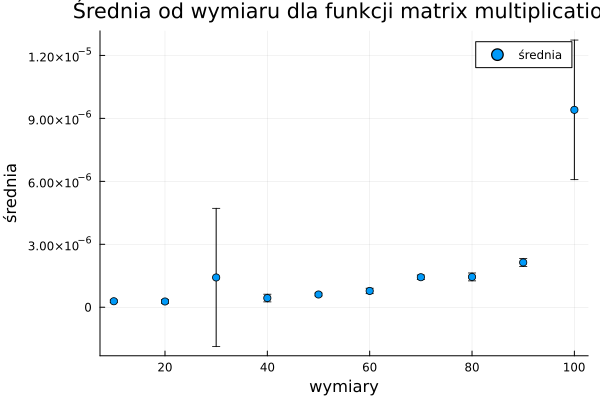

In [39]:
matrix_plot = scatter(matrix_times_mean[!,:Dimensions], matrix_times_mean[!,:Matrix_Times_mean], yerr=matrix_times_std[!,:Matrix_Times_std], title = "Średnia od wymiaru dla funkcji matrix multiplication", ylabel="średnia", xlabel = "wymiary", label="średnia")

Oba wykresy w tabelce.

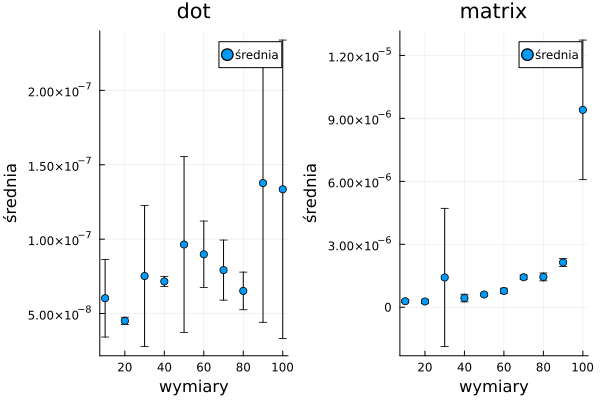

In [40]:
plot(dot_plot, matrix_plot, layout = 2, title = ["dot" "matrix"])